<a href="https://colab.research.google.com/github/ALAIKBITTUQOH/UAS_KecerdasanKomputasional/blob/main/progampython_denganmetodeCNNuntukKlasifikasiBeritaHoaksdanAsli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk wordcloud

In [ ]:
!pip install nltk

In [ ]:
pip install numpy pandas scikit-learn tensorflow matplotlib seaborn

Unique labels in dataset: [1 0]
Unique labels in dataset after mapping: ['Hoaks' 'Asli']


Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_38 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_38 (Conv1D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_38         │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 843ms/step - accuracy: 0.4733 - loss: 0.6932 - val_accuracy: 0.4000 - val_loss: 0.6898
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.7490 - loss: 0.6701 - val_accuracy: 0.9333 - val_loss: 0.6730
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9636 - loss: 0.6406 - val_accuracy: 0.8667 - val_loss: 0.6611
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9551 - loss: 0.6131 - val_accuracy: 0.8000 - val_loss: 0.6481
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9512 - loss: 0.5831 - val_accuracy: 0.8000 - val_loss: 0.6321
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9629 - loss: 0.5461 - val_accuracy: 0.8000 - val_loss: 0.6102
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9779 - loss: 0.5011 - val_accuracy: 0.8667 - val_loss: 0.5806
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9512 - loss: 0.4563 - val_accuracy: 0.9333 - val_loss: 0.5324

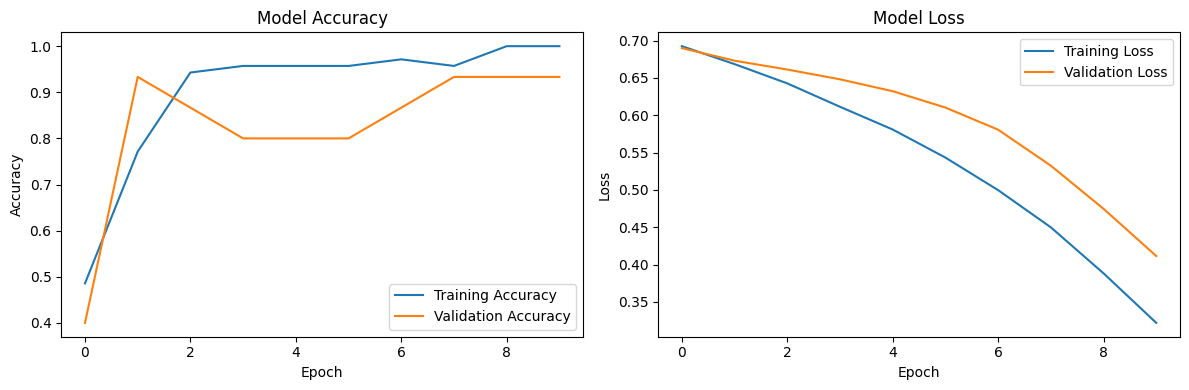

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9333 - loss: 0.3712

Test Accuracy: 0.9333
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step

Classification Report:
              precision    recall  f1-score   support

        Asli       0.88      1.00      0.93         7
       Hoaks       1.00      0.88      0.93         8

    accuracy                           0.93        15
   macro avg       0.94      0.94      0.93        15
weighted avg       0.94      0.93      0.93        15



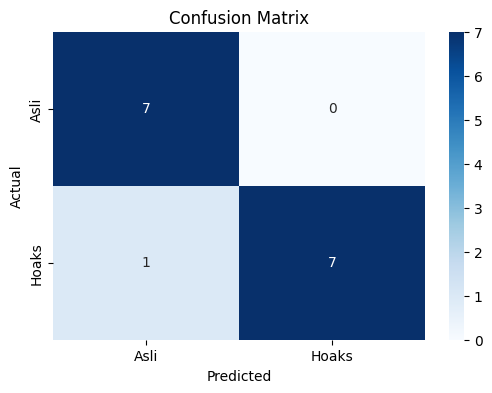


Unique Actual Labels: ['Asli' 'Hoaks']
Unique Predicted Labels: ['Asli' 'Hoaks']

Predictions saved to 'predictions.csv'


Index,Text,Source,Actual Label,Predicted Label,Prediction Status
0,Vaksin baru menyebabkan gangguan ginjal permanen,"Mafindo (turnbackhoax.id), 2023",Hoaks,Hoaks,Correct
1,Obat tradisional sembuhkan kanker dalam 3 hari,"Mafindo (turnbackhoax.id), 2022",Hoaks,Hoaks,Correct
2,Obat herbal baru sembuhkan stroke dalam 24 jam,"Kominfo, 2025",Hoaks,Hoaks,Correct
3,Studi temukan manfaat olahraga untuk kesehatan tulang,"Detik, 2023",Asli,Asli,Correct
4,Presiden umumkan lockdown total mulai besok,"Kominfo, 2025",Hoaks,Asli,Incorrect
5,Pemerintah umumkan vaksin baru menyebabkan kematian massal dalam 24 jam,"Mafindo (turnbackhoax.id), 2023",Hoaks,Hoaks,Correct
6,Studi global tunjukkan meditasi kurangi stres dan depresi,"CNN Indonesia, 2022",Asli,Asli,Correct
7,Studi temukan manfaat ikan salmon untuk kesehatan otak,"Kompas, 2023",Asli,Asli,Correct
8,Penelitian temukan manfaat teh herbal untuk relaksasi,"CNN Indonesia, 2023",Asli,Asli,Correct
9,Penelitian temukan manfaat kacang almond untuk jantung,"Detik, 2023",Asli,Asli,Correct


Index,Text,Source,Actual Label,Predicted Label,Prediction Status
3,Studi temukan manfaat olahraga untuk kesehatan tulang,"Detik, 2023",Asli,Asli,Correct
4,Presiden umumkan lockdown total mulai besok,"Kominfo, 2025",Hoaks,Asli,Incorrect
6,Studi global tunjukkan meditasi kurangi stres dan depresi,"CNN Indonesia, 2022",Asli,Asli,Correct
7,Studi temukan manfaat ikan salmon untuk kesehatan otak,"Kompas, 2023",Asli,Asli,Correct
8,Penelitian temukan manfaat teh herbal untuk relaksasi,"CNN Indonesia, 2023",Asli,Asli,Correct
9,Penelitian temukan manfaat kacang almond untuk jantung,"Detik, 2023",Asli,Asli,Correct
12,Studi temukan hubungan antara pola makan dan umur panjang,"Kompas, 2023",Asli,Asli,Correct
13,Program gizi sekolah tingkatkan prestasi akademik anak,"Kompas, 2024",Asli,Asli,Correct


Index,Text,Source,Actual Label,Predicted Label,Prediction Status
0,Vaksin baru menyebabkan gangguan ginjal permanen,"Mafindo (turnbackhoax.id), 2023",Hoaks,Hoaks,Correct
1,Obat tradisional sembuhkan kanker dalam 3 hari,"Mafindo (turnbackhoax.id), 2022",Hoaks,Hoaks,Correct
2,Obat herbal baru sembuhkan stroke dalam 24 jam,"Kominfo, 2025",Hoaks,Hoaks,Correct
5,Pemerintah umumkan vaksin baru menyebabkan kematian massal dalam 24 jam,"Mafindo (turnbackhoax.id), 2023",Hoaks,Hoaks,Correct
10,Gunung Merapi akan meletus besar minggu ini,"Mafindo (turnbackhoax.id), 2024",Hoaks,Hoaks,Correct
11,Konsumsi kunyit sembuhkan penyakit autoimun,"Mafindo (turnbackhoax.id), 2024",Hoaks,Hoaks,Correct
14,Minyak kelapa murni bisa cegah virus corona,"Mafindo (turnbackhoax.id), 2022",Hoaks,Hoaks,Correct


In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import display, HTML

# Mengatur pandas untuk menampilkan teks penuh
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

# 1. Fungsi untuk memuat dan memproses data
def load_and_preprocess_data(file_path, text_column, label_column, source_column, max_words=10000, max_len=100):
    df = pd.read_csv(file_path)
    required_columns = [text_column, label_column, source_column]
    if not all(col in df.columns for col in required_columns):
        raise ValueError(f"Dataset must contain '{text_column}', '{label_column}', and '{source_column}' columns")
    if df[text_column].isnull().any() or df[label_column].isnull().any() or df[source_column].isnull().any():
        raise ValueError("Dataset contains null values in 'text', 'label', or 'source' columns")
    print("Unique labels in dataset:", df[label_column].unique())
    label_mapping = {0: 'Asli', 1: 'Hoaks'}
    df[label_column] = df[label_column].astype(int).map(label_mapping)
    valid_labels = {'Asli', 'Hoaks'}
    if not set(df[label_column].unique()).issubset(valid_labels):
        raise ValueError(f"Invalid labels found in dataset: {df[label_column].unique()}. Expected 'Asli' or 'Hoaks'")
    print("Unique labels in dataset after mapping:", df[label_column].unique())
    texts = df[text_column].values
    labels = df[label_column].values
    sources = df[source_column].values
    label_encoder = LabelEncoder()
    labels_encoded = label_encoder.fit_transform(labels)
    tokenizer = Tokenizer(num_words=max_words)
    tokenizer.fit_on_texts(texts)
    sequences = tokenizer.texts_to_sequences(texts)
    X = pad_sequences(sequences, maxlen=max_len)
    X_train, X_temp, y_train, y_temp, texts_train, texts_temp, sources_train, sources_temp = train_test_split(
        X, labels_encoded, texts, sources, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test, texts_val, texts_test, sources_val, sources_test = train_test_split(
        X_temp, y_temp, texts_temp, sources_temp, test_size=0.5, random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test, texts_test, sources_test, tokenizer, label_encoder

# 2. Fungsi untuk membangun model CNN
def build_cnn_model(vocab_size, embedding_dim=100):
    model = Sequential([
        Embedding(vocab_size, embedding_dim),
        Conv1D(filters=128, kernel_size=5, activation='relu'),
        GlobalMaxPooling1D(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 3. Fungsi untuk melatih model
def train_model(model, X_train, y_train, X_val, y_val, epochs=10, batch_size=32):
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                       validation_data=(X_val, y_val), callbacks=[early_stopping, checkpoint])
    return history

# 4. Fungsi untuk mengevaluasi model dan menampilkan prediksi dengan format rapi
def evaluate_model(model, X_test, y_test, texts_test, sources_test, label_encoder):
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"\nTest Accuracy: {test_accuracy:.4f}")
    y_pred = (model.predict(X_test) > 0.5).astype("int32").flatten()
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Asli', 'Hoaks']))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Asli', 'Hoaks'], yticklabels=['Asli', 'Hoaks'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Mendapatkan label asli
    actual_labels = label_encoder.inverse_transform(y_test)
    predicted_labels = label_encoder.inverse_transform(y_pred)
    print("\nUnique Actual Labels:", np.unique(actual_labels))
    print("Unique Predicted Labels:", np.unique(predicted_labels))

    # Membuat DataFrame untuk semua prediksi
    prediction_status = ['Correct' if actual == pred else 'Incorrect' for actual, pred in zip(actual_labels, predicted_labels)]
    results = pd.DataFrame({
        'Index': range(len(texts_test)),
        'Text': texts_test,
        'Source': sources_test,
        'Actual Label': actual_labels,
        'Predicted Label': predicted_labels,
        'Prediction Status': prediction_status
    })

    # Menyimpan hasil prediksi ke CSV
    results.to_csv('predictions.csv', index=False)
    print("\nPredictions saved to 'predictions.csv'")

    # Fungsi untuk membuat tabel HTML yang rapi
    def display_html_table(df, title):
        html = f"<h3 style='color: #000000; background-color: #f2f2f2; padding: 10px; text-align: center; border-radius: 5px;'>{title}</h3>"
        html += "<table border='1' style='border-collapse: collapse; width: 100%; margin-top: 10px;'>"
        html += "<tr style='background-color: #f2f2f2; color: #000000;'><th>Index</th><th>Text</th><th>Source</th><th>Actual Label</th><th>Predicted Label</th><th>Prediction Status</th></tr>"
        for _, row in df.iterrows():
            html += "<tr>"
            html += f"<td style='padding: 8px;'>{row['Index']}</td><td style='padding: 8px;'>{row['Text']}</td><td style='padding: 8px;'>{row['Source']}</td><td style='padding: 8px;'>{row['Actual Label']}</td><td style='padding: 8px;'>{row['Predicted Label']}</td><td style='padding: 8px;'>{row['Prediction Status']}</td>"
            html += "</tr>"
        html += "</table>"
        display(HTML(html))

    # Tampilkan tabel untuk semua prediksi
    display_html_table(results, "Semua Prediksi")

    # Memisahkan berita Asli dan Hoaks
    real_predictions = results[results['Predicted Label'] == 'Asli']
    hoax_predictions = results[results['Predicted Label'] == 'Hoaks']

    # Tampilkan tabel untuk berita Asli
    display_html_table(real_predictions, "Berita yang Diklasifikasikan sebagai Asli")

    # Tampilkan tabel untuk berita Hoaks
    display_html_table(hoax_predictions, "Berita yang Diklasifikasikan sebagai Hoaks")

# 5. Fungsi untuk visualisasi hasil pelatihan
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

# 6. Fungsi utama
def main():
    file_path = '/content/drive/MyDrive/Colab Notebooks/news_dataset_100.csv'
    text_column = 'text'
    label_column = 'label'
    source_column = 'source'
    max_words = 10000
    max_len = 100
    embedding_dim = 100
    epochs = 10
    batch_size = 32

    X_train, X_val, X_test, y_train, y_val, y_test, texts_test, sources_test, tokenizer, label_encoder = load_and_preprocess_data(
        file_path, text_column, label_column, source_column, max_words, max_len)
    model = build_cnn_model(max_words, embedding_dim)
    model.summary()
    history = train_model(model, X_train, y_train, X_val, y_val, epochs, batch_size)
    plot_training_history(history)
    evaluate_model(model, X_test, y_test, texts_test, sources_test, label_encoder)

if __name__ == "__main__":
    main()